In [1]:
# Import dependencies 
import os
import csv 
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [11]:
fedfunds_path= "Resources/FEDFUNDS.csv"
sales_qty_path= "sales_qty_clean.csv"

In [12]:
fedfunds= pd.read_csv(fedfunds_path)
fedfunds

,DATE,FEDFUNDS
0,2019-01-01,2.40
1,2019-02-01,2.40
2,2019-03-01,2.41
3,2019-04-01,2.42
4,2019-05-01,2.39
...,...,...
60,2024-01-01,5.33
61,2024-02-01,5.33
62,2024-03-01,5.33
63,2024-04-01,5.33


In [13]:
sales_qty= pd.read_csv(sales_qty_path).rename(columns={"Month":"DATE"})
sales_qty

,DATE,National,"Austin, TX","Idaho Falls, ID","Pine Bluff, AR","Shreveport,LA"
0,2019-01-01,332655,728,55,9,25
1,2019-02-01,370924,925,58,22,25
2,2019-03-01,485757,1108,66,18,22
3,2019-04-01,546067,1267,84,18,29
4,2019-05-01,641458,1490,120,26,20
...,...,...,...,...,...,...
59,2023-12-01,358212,628,60,17,124
60,2024-01-01,288939,515,44,20,107
61,2024-02-01,341003,707,70,25,138
62,2024-03-01,409356,852,73,22,170


In [15]:
data= pd.merge(fedfunds,sales_qty,how="left", on= "DATE")
data

,DATE,FEDFUNDS,National,"Austin, TX","Idaho Falls, ID","Pine Bluff, AR","Shreveport,LA"
0,2019-01-01,2.40,332655.0,728.0,55.0,9.0,25.0
1,2019-02-01,2.40,370924.0,925.0,58.0,22.0,25.0
2,2019-03-01,2.41,485757.0,1108.0,66.0,18.0,22.0
3,2019-04-01,2.42,546067.0,1267.0,84.0,18.0,29.0
4,2019-05-01,2.39,641458.0,1490.0,120.0,26.0,20.0
...,...,...,...,...,...,...,...
60,2024-01-01,5.33,288939.0,515.0,44.0,20.0,107.0
61,2024-02-01,5.33,341003.0,707.0,70.0,25.0,138.0
62,2024-03-01,5.33,409356.0,852.0,73.0,22.0,170.0
63,2024-04-01,5.33,445800.0,909.0,72.0,23.0,169.0


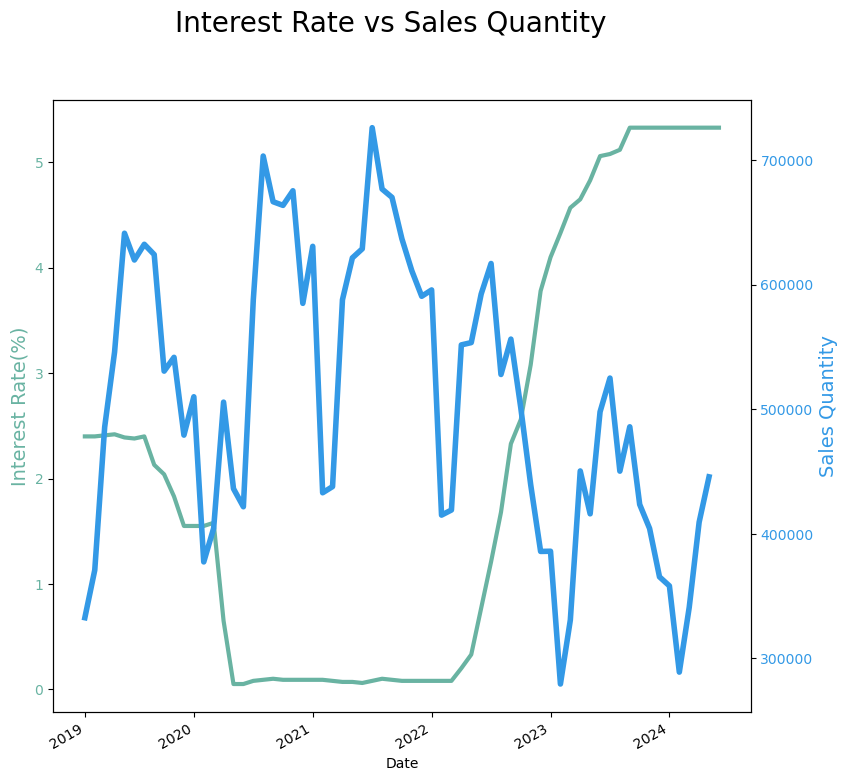

In [18]:
fedfunds_color = "#69b3a2"
salesqty_color = "#3399e6"

fig, ax1 = plt.subplots(figsize=(9, 9))
ax2 = ax1.twinx()

ax1.plot(data["DATE"],data["FEDFUNDS"],color=fedfunds_color, lw=3)
ax2.plot(data["DATE"],data["National"], color= salesqty_color, lw=4)

ax1.set_xlabel("Date")
ax1.set_ylabel("Interest Rate(%)", color=fedfunds_color, fontsize=14)
ax1.tick_params(axis="y", labelcolor=fedfunds_color)

ax2.set_ylabel("Sales Quantity", color=salesqty_color, fontsize=14)
ax2.tick_params(axis="y", labelcolor=salesqty_color)

fig.suptitle("Interest Rate vs Sales Quantity", fontsize=20)
fig.autofmt_xdate()

x1=[0,11,23,35,47,59]
labels = [2019, 2020, 2021, 2022, 2023, 2024]
plt.xticks(x1, labels,rotation=45)

plt.savefig("Interest_Rate_vs_Sales_Quantity.png")
plt.show()